In [1]:
from keras.models import load_model
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = load_model("cnn_image_classifier.h5")

In [3]:
URL = "https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg"
test_image = imread(URL)

In [4]:
def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

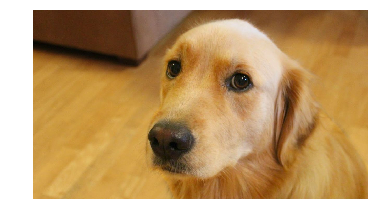

In [5]:
show_image(test_image)

In [6]:
def fix_image(image):
    return resize(image, (150, 150, 3), mode='constant')

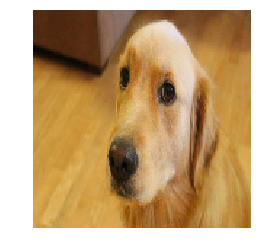

In [7]:
image_in = fix_image(test_image)
show_image(image_in)

In [8]:
def get_prediction(image):
    images_to_predict = np.asarray([image])
    predictions = model.predict(images_to_predict)
    prediction = predictions[0][0]
    return prediction

In [9]:
prediction = get_prediction(image_in)
print("I predict " + str(prediction) + "!")

I predict 0.992685!


In [10]:
def cat_or_dog(image):
    images_to_predict = np.asarray([image])
    predictions = model.predict(images_to_predict)
    prediction = predictions[0][0]
    if prediction > 0.5:
        return "dog"
    else:
        return "cat"

In [11]:
print("I predict " + cat_or_dog(image_in) + "!")

I predict dog!
